# Direct S3 Data Access tutorial (Multi-Mission Optimally Interpolated Sea Surface Salinity Global Monthly Dataset V1)

This tutorial only works in a jupyterhub hosted at AWS US-WEST-2.

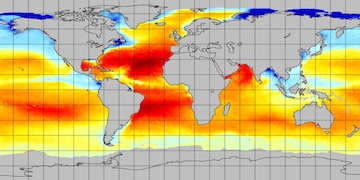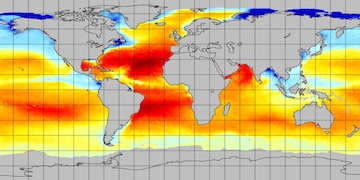

* **User guide**: http://iprc.soest.hawaii.edu/users/oleg/oisss/GLB/OISSS_Product_Notes.pdf
* **DOI** [10.5067/SMP10-4UMCS](https://podaac.jpl.nasa.gov/dataset/OISSS_L4_multimission_monthly_v1?ids=&values=&search=oisss&provider=POCLOUD)
* **Short Name**: OISSS_L4_multimission_monthly_v1
* **Description**
```
This is a level 4 product on a 0.25-degree spatial and monthly temporal grid. The product is the monthly mean of the level 4 OISSS dataset using three satellite missions: the Aquarius/SAC-D, Soil Moisture Active Passive (SMAP) and Soil Moisture and Ocean Salinity (SMOS) using Optimal Interpolation (OI) with a 7-day decorrelation time scale. This dataset is produced by the International Pacific Research Center (IPRC) of the University of Hawaii at Manoa in collaboration with the Remote Sensing Systems (RSS), Santa Rosa, California. More details can be found in the users guide and Addendum I to the product Technical Notes.
Version	1.0
```
* **Data Citation** (Please insert the following two citations in your reference)
>1. IPRC/SOEST University of Hawaii, Manoa. 2022. Multi-Mission Optimally Interpolated Sea Surface Salinity Global Monthly Dataset V1. Ver. 1.0. PO.DAAC, CA, USA. Dataset accessed [YYYY-MM-DD] at https://doi.org/10.5067/SMP10-4UMCS
>2. Melnichenko, O., P. Hacker., N. Maximenko, G. Lagerloef, and J. Potemra. 2021., 121. doi:10.1002/2015JC011343

* **Data revision history** 

|Version | Release Date     | Data Provider | PODAAC Point of Contact |
|--------|----------|---------------|-------------------------|
|V1      |2/17/2022 | O. Melnichenko| Yibo Jiang              |


* **Acknowledgement**

## Content

### Specify parameters
The following parameters are used for this particular dataset. 

In [1]:
#Short_name is used to identify a specific dataset in NASA Earthdata. 
short_name='OISSS_L4_multimission_monthly_v1'

## Direct S3 access

Use EarthData Login (EDL) to get a direct S3 access. Direct S3 access is only available to users running in AWS, us-west-2 region. All other access must come from HTTP requests for PO.DAAC data.

Create an EDL following this [link](https://earthdata.nasa.gov/eosdis/science-system-description/eosdis-components/earthdata-login).

Create a .netrc file in the home folder following [these instructions](https://urs.earthdata.nasa.gov/documentation/for_users/data_access/curl_and_wget).

**.netrc** is essential to enable the following blocks. 

In [2]:
def init_S3FileSystem():
    import requests,s3fs
    s3_cred_endpoint = {
        'podaac':'https://archive.podaac.earthdata.nasa.gov/s3credentials',
        'lpdaac':'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentials'}

    temp_creds_url = s3_cred_endpoint['podaac']
    creds = requests.get(temp_creds_url).json()
    s3 = s3fs.S3FileSystem(anon=False,
                           key=creds['accessKeyId'],
                           secret=creds['secretAccessKey'], 
                           token=creds['sessionToken'])
    return s3
s3sys=init_S3FileSystem()

## Explore the file system.

In [3]:
import pprint

#s3://podaac-ops-cumulus-protected is the PODAAC S3 bucket. 
#s3://podaac-ops-cumulus-protected/{short_name} is the path to this dataset. 

#This dataset is organized by year.

years=s3sys.glob("s3://podaac-ops-cumulus-protected/%s/*"%short_name)
pprint.pprint(years)

for year in years:
    fns= s3sys.glob(year+"/*nc")
    print("Year %s: total files (granules) %i."%(year.split('/')[-1], len(fns)))

['podaac-ops-cumulus-protected/OISSS_L4_multimission_monthly_v1/2011',
 'podaac-ops-cumulus-protected/OISSS_L4_multimission_monthly_v1/2012',
 'podaac-ops-cumulus-protected/OISSS_L4_multimission_monthly_v1/2013',
 'podaac-ops-cumulus-protected/OISSS_L4_multimission_monthly_v1/2014',
 'podaac-ops-cumulus-protected/OISSS_L4_multimission_monthly_v1/2015',
 'podaac-ops-cumulus-protected/OISSS_L4_multimission_monthly_v1/2016',
 'podaac-ops-cumulus-protected/OISSS_L4_multimission_monthly_v1/2017',
 'podaac-ops-cumulus-protected/OISSS_L4_multimission_monthly_v1/2018',
 'podaac-ops-cumulus-protected/OISSS_L4_multimission_monthly_v1/2019',
 'podaac-ops-cumulus-protected/OISSS_L4_multimission_monthly_v1/2020',
 'podaac-ops-cumulus-protected/OISSS_L4_multimission_monthly_v1/2021']
Year 2011: total files (granules) 4.
Year 2012: total files (granules) 12.
Year 2013: total files (granules) 12.
Year 2014: total files (granules) 12.
Year 2015: total files (granules) 12.
Year 2016: total files (granul

In [4]:
fns= s3sys.glob("s3://podaac-ops-cumulus-protected/%s/*/*nc"%short_name)
print("Open all %i files."%len(fns))
#pprint.pprint(fns)

import xarray as xr

d=xr.open_dataset(s3sys.open(fns[0]))
d

Open all 120 files.


<xarray.Dataset>
Dimensions:          (longitude: 1440, latitude: 720, time: 1)
Coordinates:
  * longitude        (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * latitude         (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * time             (time) datetime64[ns] 2011-09-16
Data variables:
    sss              (latitude, longitude, time) float32 ...
    sss_uncertainty  (latitude, longitude, time) float32 ...
    sss_climatology  (latitude, longitude, time) float32 ...
    sss_anomaly      (latitude, longitude, time) float32 ...
Attributes: (12/42)
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      CF Standard Name Table v27
    Title:                         Multi-Mission Optimally Interpolated Sea S...
    Short_Name:                    OISSS_L4_multimission_v1_monthly
    Version:                       V1.0
    Processing_Level:              Level 4
    ...                            ...
    geospatial_lat_resolution:     [0.25]
    geospatial_lat_units:          degrees_north
    geospatial_lon_min:            [-180.]
    geospatial_lon_max:            [180.]
    geospatial_lon_resolution:     [0.25]
    geospatial_lon_units:          degrees_east

## Plot an example

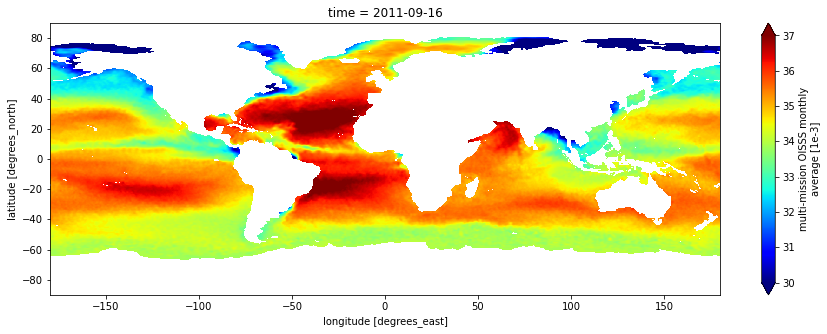

In [24]:
plt.figure(figsize=(15,5))
d['sss'][:,:,0].plot(cmap=plt.cm.jet,vmin=30,vmax=37)

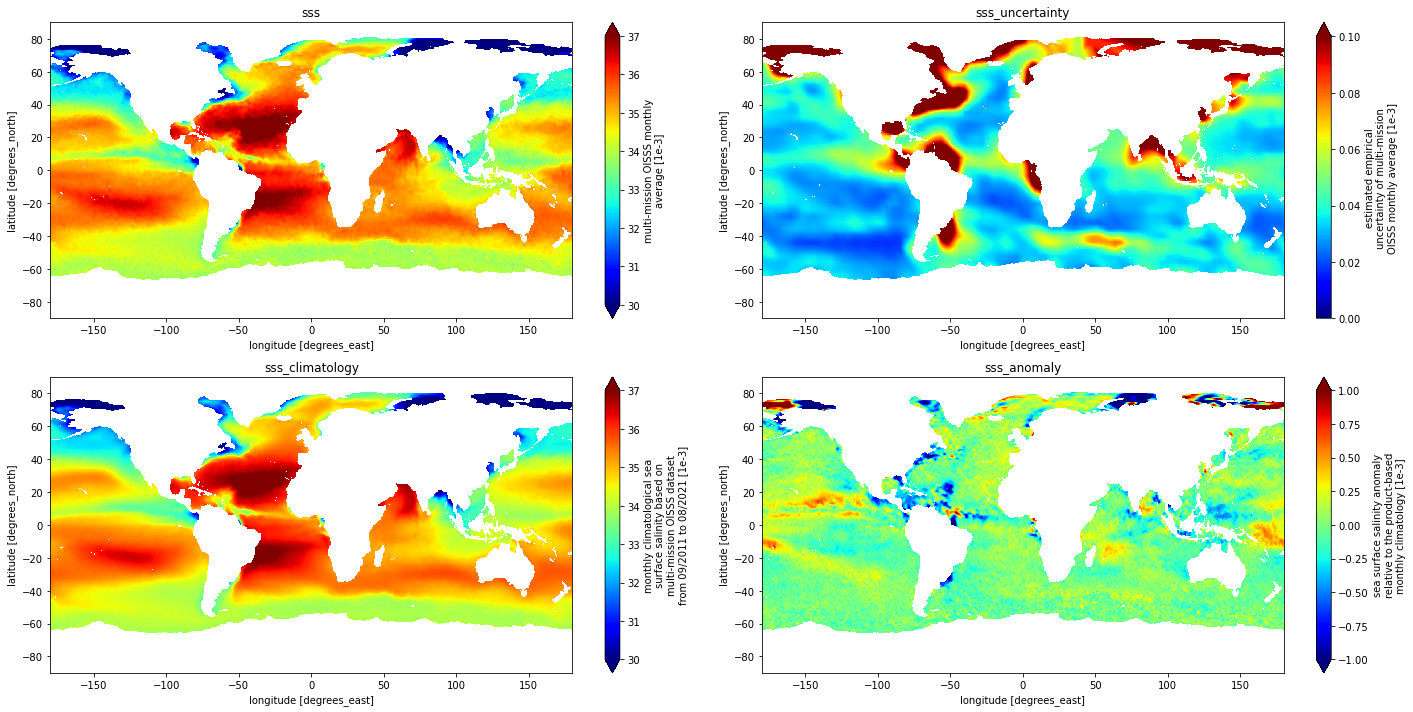

In [22]:
import pylab as plt

fig,ax=plt.subplots(2,2,figsize=(20,10))

vars=d.keys()

axx=ax.flatten()

#set the colorbar limit
clim=[[30,37],[0,0.1],[30,37],[-1,1]]

for i,var in enumerate(vars):
    d[var][:,:,0].plot(ax=axx[i],cmap='jet',vmin=clim[i][0],vmax=clim[i][1])
    axx[i].set_title(var)
plt.tight_layout()

### Load all files to plot a time series

In [14]:
%timeit
fileset = [s3sys.open(file) for file in fns]
data = xr.open_mfdataset(fileset ,concat_dim='time',combine='nested',engine='h5netcdf')
data

<xarray.Dataset>
Dimensions:          (longitude: 1440, latitude: 720, time: 120)
Coordinates:
  * longitude        (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * latitude         (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * time             (time) datetime64[ns] 2011-09-16 2011-10-16 ... 2021-08-16
Data variables:
    sss              (latitude, longitude, time) float32 dask.array<chunksize=(720, 1440, 1), meta=np.ndarray>
    sss_uncertainty  (latitude, longitude, time) float32 dask.array<chunksize=(720, 1440, 1), meta=np.ndarray>
    sss_climatology  (latitude, longitude, time) float32 dask.array<chunksize=(720, 1440, 1), meta=np.ndarray>
    sss_anomaly      (latitude, longitude, time) float32 dask.array<chunksize=(720, 1440, 1), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      CF Standard Name Table v27
    Title:                         Multi-Mission Optimally Interpolated Sea S...
    Short_Name:                    OISSS_L4_multimission_v1_monthly
    Version:                       V1.0
    Processing_Level:              Level 4
    ...                            ...
    geospatial_lat_resolution:     [0.25]
    geospatial_lat_units:          degrees_north
    geospatial_lon_min:            [-180.]
    geospatial_lon_max:            [180.]
    geospatial_lon_resolution:     [0.25]
    geospatial_lon_units:          degrees_east

## Plot a time series at a point in the california current. 

Plot the time series of the SSS at (124W, 35N). 

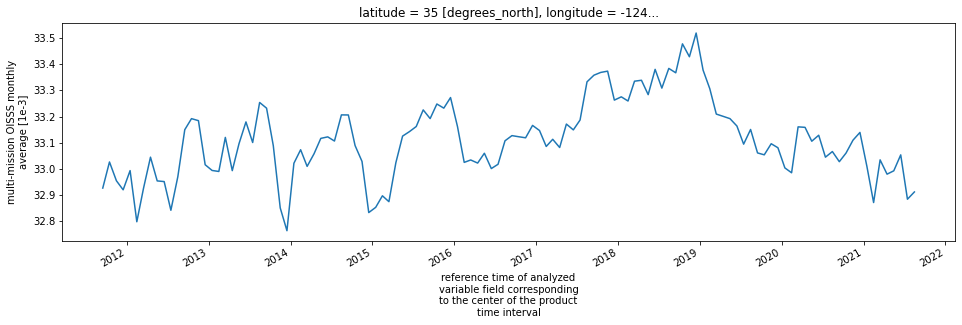

In [19]:
plt.figure(figsize=(16,4))
data['sss'].interp(latitude=35,longitude=-124).plot()

# Demonstrate opendap

# Direct download using data-downloader